# Residual Integration Neural Net

# Problem statement :

Let us consider a dynamical system, whose time-varying state $X_t$ is governed by the following ordinary differential equation (ODE):

\begin{equation}
\frac{dX_t}{dt}= F(t,X_t)
\label{eq:sys dyn}
\end{equation}

where $F$ is the dynamical operator. Most of the time, this ODE cannot be solved analytically and numerical integration techniques using discrete approximations are implemented. 

In this work, we focus on explicit integration schemes. A one-step explicit integration scheme is defined as: 

\begin{equation}
\label{eq:int_gen_schm}
X_{t_{n+1}} = X_{t_{n}} + h\Phi(t_{n},X_{t_{n}},h)
\end{equation}

with $\Phi(t_{n},X_{t_{n}},h)$ a numerical integration operator. Here, we aim to learn a prediction operator based on $\Phi$ and an approximation of the dynamical model $F(t,X_t)$ so that the forecasting error (typically, a one-step-ahead error) is minimized.

In this notebook, will learn an approximation of both $\Phi$ and $F(t,X_t)$ of the lorenz 63 model given a poorly sampled time series.


In [1]:
from generate_data import generate_data
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from RINN import RINN_model

ModuleNotFoundError: No module named 'torch'

In [2]:
!pip install torch

  Using cached https://files.pythonhosted.org/packages/f8/02/880b468bd382dc79896eaecbeb8ce95e9c4b99a24902874a2cef0b562cea/torch-0.1.2.post2.tar.gz


Could not install packages due to an EnvironmentError: [Errno 28] No space left on device



In [2]:
# dataset parameters
class GD:
    model = 'Lorenz_63'
    class parameters:
        sigma = 10.0
        rho = 28.0
        beta = 8.0/3
    dt_integration = 0.4 # integration time
    dt_states = 1 # number of integeration times between consecutive states (for xt and catalog)
    dt_obs = 8# number of integration times between consecutive observations (for yo)
    var_obs = np.array([0,1]) # indices of the observed variables
    nb_loop_train = 5000.01 # size of the catalog
    nb_loop_test = 100 # size of the true state and noisy observations
    sigma2_catalog = 0.0 # variance of the model error to generate the catalog
    sigma2_obs = 2.0 # variance of the observation error to generate observation
    
# run the data generation
catalog, xt, yo = generate_data(GD)

In [3]:
#training data
batch_size = 100
X_train = np.reshape(catalog.analogs,(int(catalog.analogs.shape[0]/batch_size),batch_size,catalog.analogs.shape[1]))
Grad_t  = np.gradient(X_train)[1]/GD.dt_integration
Y_train = np.reshape(catalog.successors,(int(catalog.analogs.shape[0]/batch_size),batch_size,catalog.analogs.shape[1]))

In [4]:
order=11 #number of stages of the runge kutta scheme

params = {}#NN parameters 
params['transition_layers']=1
params['bi_linear_layers']=3
params['dim_hidden_linear'] = 3
params['dim_input']=3
params['dim_observations'] = 3
params['dim_output']=3
params['dim_hidden']=3
params['dt_integration']=GD.dt_integration
params['ntrain']=[100,1000]
params['lr']=0.001
pretrained = False
path = ''

# Learn dynamical and integration models, stop when loss ~ 0.2

In [5]:
dyn_mdl = RINN_model(X_train, Y_train, Grad_t, params, order, pretrained ,path)

Learning dynamical model


/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/_reduction.py:13: UserWarning: reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.
  warnings.warn("reduction='elementwise_mean' is deprecated, please use reduction='mean' instead.")


0 tensor(191.6113, grad_fn=<MseLossBackward>)
1 tensor(187.3033, grad_fn=<MseLossBackward>)
2 tensor(181.9703, grad_fn=<MseLossBackward>)
3 tensor(179.1191, grad_fn=<MseLossBackward>)
4 tensor(178.5593, grad_fn=<MseLossBackward>)
5 tensor(178.0983, grad_fn=<MseLossBackward>)
6 tensor(177.6681, grad_fn=<MseLossBackward>)
7 tensor(177.3179, grad_fn=<MseLossBackward>)
8 tensor(177.0363, grad_fn=<MseLossBackward>)
9 tensor(176.7980, grad_fn=<MseLossBackward>)
10 tensor(176.6185, grad_fn=<MseLossBackward>)
11 tensor(176.4901, grad_fn=<MseLossBackward>)
12 tensor(176.3969, grad_fn=<MseLossBackward>)
13 tensor(176.3261, grad_fn=<MseLossBackward>)
14 tensor(176.2693, grad_fn=<MseLossBackward>)
15 tensor(176.2215, grad_fn=<MseLossBackward>)
16 tensor(176.1800, grad_fn=<MseLossBackward>)
17 tensor(176.1432, grad_fn=<MseLossBackward>)
18 tensor(176.1100, grad_fn=<MseLossBackward>)
19 tensor(176.0799, grad_fn=<MseLossBackward>)
20 tensor(176.0525, grad_fn=<MseLossBackward>)
21 tensor(176.0272, gra

81 tensor(52.2810, grad_fn=<MulBackward0>)
82 tensor(52.9594, grad_fn=<MulBackward0>)
83 tensor(53.6292, grad_fn=<MulBackward0>)
84 tensor(51.3562, grad_fn=<MulBackward0>)
85 tensor(50.4465, grad_fn=<MulBackward0>)
86 tensor(50.0141, grad_fn=<MulBackward0>)
87 tensor(54.5887, grad_fn=<MulBackward0>)
88 tensor(50.1389, grad_fn=<MulBackward0>)
89 tensor(48.9647, grad_fn=<MulBackward0>)
90 tensor(51.6942, grad_fn=<MulBackward0>)
91 tensor(49.6554, grad_fn=<MulBackward0>)
92 tensor(49.0988, grad_fn=<MulBackward0>)
93 tensor(48.5525, grad_fn=<MulBackward0>)
94 tensor(48.5873, grad_fn=<MulBackward0>)
95 tensor(57.2357, grad_fn=<MulBackward0>)
96 tensor(52.6522, grad_fn=<MulBackward0>)
97 tensor(50.1932, grad_fn=<MulBackward0>)
98 tensor(48.5687, grad_fn=<MulBackward0>)
99 tensor(47.5835, grad_fn=<MulBackward0>)
100 tensor(46.4662, grad_fn=<MulBackward0>)
101 tensor(46.3080, grad_fn=<MulBackward0>)
102 tensor(45.4348, grad_fn=<MulBackward0>)
103 tensor(45.9809, grad_fn=<MulBackward0>)
104 ten

270 tensor(0.8716, grad_fn=<MulBackward0>)
271 tensor(1.0002, grad_fn=<MulBackward0>)
272 tensor(0.8755, grad_fn=<MulBackward0>)
273 tensor(0.8921, grad_fn=<MulBackward0>)
274 tensor(1.0331, grad_fn=<MulBackward0>)
275 tensor(0.8794, grad_fn=<MulBackward0>)
276 tensor(0.9080, grad_fn=<MulBackward0>)
277 tensor(0.9165, grad_fn=<MulBackward0>)
278 tensor(0.8662, grad_fn=<MulBackward0>)
279 tensor(0.8765, grad_fn=<MulBackward0>)
280 tensor(0.8298, grad_fn=<MulBackward0>)
281 tensor(0.7514, grad_fn=<MulBackward0>)
282 tensor(0.6915, grad_fn=<MulBackward0>)
283 tensor(0.7413, grad_fn=<MulBackward0>)
284 tensor(0.6175, grad_fn=<MulBackward0>)
285 tensor(0.7453, grad_fn=<MulBackward0>)
286 tensor(0.6118, grad_fn=<MulBackward0>)
287 tensor(0.5923, grad_fn=<MulBackward0>)
288 tensor(0.4543, grad_fn=<MulBackward0>)
289 tensor(0.7655, grad_fn=<MulBackward0>)
290 tensor(0.3849, grad_fn=<MulBackward0>)
291 tensor(0.7115, grad_fn=<MulBackward0>)
292 tensor(0.3649, grad_fn=<MulBackward0>)
293 tensor(

461 tensor(0.3665, grad_fn=<MulBackward0>)
462 tensor(0.2102, grad_fn=<MulBackward0>)
463 tensor(0.4414, grad_fn=<MulBackward0>)
464 tensor(0.2246, grad_fn=<MulBackward0>)
465 tensor(0.5082, grad_fn=<MulBackward0>)
466 tensor(0.2253, grad_fn=<MulBackward0>)
467 tensor(0.1693, grad_fn=<MulBackward0>)
468 tensor(0.4596, grad_fn=<MulBackward0>)
469 tensor(0.2044, grad_fn=<MulBackward0>)
470 tensor(0.2528, grad_fn=<MulBackward0>)
471 tensor(0.1929, grad_fn=<MulBackward0>)
472 tensor(0.4495, grad_fn=<MulBackward0>)
473 tensor(0.2148, grad_fn=<MulBackward0>)
474 tensor(0.2723, grad_fn=<MulBackward0>)
475 tensor(0.2687, grad_fn=<MulBackward0>)
476 tensor(0.2808, grad_fn=<MulBackward0>)
477 tensor(0.2316, grad_fn=<MulBackward0>)
478 tensor(0.2330, grad_fn=<MulBackward0>)
479 tensor(0.2614, grad_fn=<MulBackward0>)
480 tensor(0.2219, grad_fn=<MulBackward0>)
481 tensor(0.1838, grad_fn=<MulBackward0>)
482 tensor(0.2237, grad_fn=<MulBackward0>)
483 tensor(0.3396, grad_fn=<MulBackward0>)
484 tensor(

652 tensor(0.2707, grad_fn=<MulBackward0>)
653 tensor(0.8049, grad_fn=<MulBackward0>)
654 tensor(0.3544, grad_fn=<MulBackward0>)
655 tensor(0.2226, grad_fn=<MulBackward0>)
656 tensor(0.1773, grad_fn=<MulBackward0>)
657 tensor(0.1890, grad_fn=<MulBackward0>)
658 tensor(0.3081, grad_fn=<MulBackward0>)
659 tensor(0.6047, grad_fn=<MulBackward0>)
660 tensor(0.2190, grad_fn=<MulBackward0>)
661 tensor(0.2389, grad_fn=<MulBackward0>)
662 tensor(0.3303, grad_fn=<MulBackward0>)
663 tensor(0.2093, grad_fn=<MulBackward0>)
664 tensor(0.1476, grad_fn=<MulBackward0>)
665 tensor(0.2139, grad_fn=<MulBackward0>)
666 tensor(0.2940, grad_fn=<MulBackward0>)
667 tensor(0.1719, grad_fn=<MulBackward0>)
668 tensor(0.2050, grad_fn=<MulBackward0>)
669 tensor(0.2030, grad_fn=<MulBackward0>)
670 tensor(0.3102, grad_fn=<MulBackward0>)
671 tensor(0.2126, grad_fn=<MulBackward0>)
672 tensor(0.4921, grad_fn=<MulBackward0>)
673 tensor(0.1339, grad_fn=<MulBackward0>)
674 tensor(0.1632, grad_fn=<MulBackward0>)
675 tensor(

843 tensor(0.1878, grad_fn=<MulBackward0>)
844 tensor(0.1673, grad_fn=<MulBackward0>)
845 tensor(0.1904, grad_fn=<MulBackward0>)
846 tensor(0.2453, grad_fn=<MulBackward0>)
847 tensor(0.2668, grad_fn=<MulBackward0>)
848 tensor(0.3482, grad_fn=<MulBackward0>)
849 tensor(0.1695, grad_fn=<MulBackward0>)
850 tensor(0.2650, grad_fn=<MulBackward0>)
851 tensor(0.1444, grad_fn=<MulBackward0>)
852 tensor(0.1633, grad_fn=<MulBackward0>)
853 tensor(0.3512, grad_fn=<MulBackward0>)
854 tensor(0.3092, grad_fn=<MulBackward0>)
855 tensor(0.1348, grad_fn=<MulBackward0>)
856 tensor(0.2176, grad_fn=<MulBackward0>)
857 tensor(0.2468, grad_fn=<MulBackward0>)
858 tensor(0.2325, grad_fn=<MulBackward0>)
859 tensor(0.1473, grad_fn=<MulBackward0>)
860 tensor(0.2646, grad_fn=<MulBackward0>)
861 tensor(0.1609, grad_fn=<MulBackward0>)
862 tensor(0.2994, grad_fn=<MulBackward0>)
863 tensor(0.3834, grad_fn=<MulBackward0>)
864 tensor(0.1043, grad_fn=<MulBackward0>)
865 tensor(0.1790, grad_fn=<MulBackward0>)
866 tensor(

In [6]:
torch.save(dyn_mdl.state_dict(), 'Model_L63_RK11_h_04_.pt')

In [7]:
nb_steps_pred = 1000
t_pred = nb_steps_pred * GD.dt_integration
y_pred=np.zeros((nb_steps_pred,params['dim_output']))
tmp = np.reshape(xt.values[0,:],(1,params['dim_output']))
tmp = Variable(torch.from_numpy(tmp).float())

for i in range(nb_steps_pred):
    y_pred[i,:] = dyn_mdl(tmp,GD.dt_integration,order)[0].data.numpy()
    tmp = Variable(torch.from_numpy(np.reshape(y_pred[i,:] ,(1,params['dim_output']))).float())

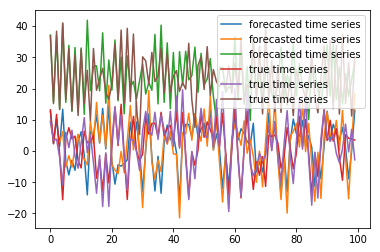

In [8]:
plt.plot(y_pred[:100,:], label = 'forecasted time series')
plt.plot(xt.values[1:101,:],label = 'true time series')
plt.legend()

Text(0, 0.5, 'Lorenz 63 states')

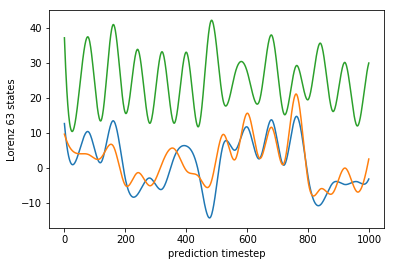

In [9]:
from scipy.interpolate import interp1d
interp_time_step = 0.01
time_step_ratio = GD.dt_integration/interp_time_step
t_new  = np.linspace(0, t_pred, num=int(nb_steps_pred*time_step_ratio), endpoint=True)
t_init = np.linspace(0, t_pred, num=nb_steps_pred, endpoint=True)
RINN_Interp=interp1d(t_init, y_pred,axis=0, kind='cubic')
plt.plot(RINN_Interp(t_new)[:1000,:])
plt.xlabel('prediction timestep'); plt.ylabel('Lorenz 63 states')

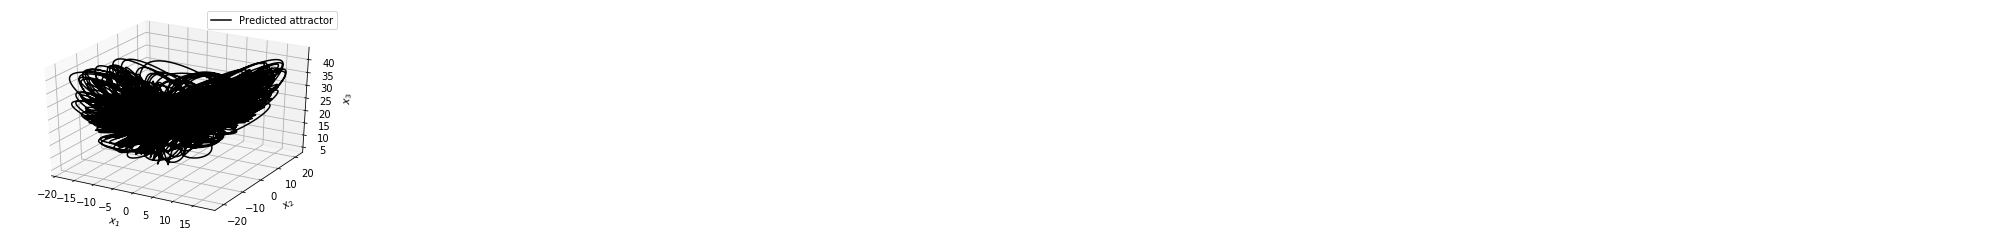

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig   =plt.figure()
ax    =fig.gca(projection='3d')
line1,=ax.plot(RINN_Interp(t_new)[:,0],RINN_Interp(t_new)[:,1],RINN_Interp(t_new)[:,2],'k')
ax.set_xlabel('$x_1$');ax.set_ylabel('$x_2$');ax.set_zlabel('$x_3$')
plt.legend([line1], ['Predicted attractor'])

Text(0, 0.5, 'Lorenz 63 states')

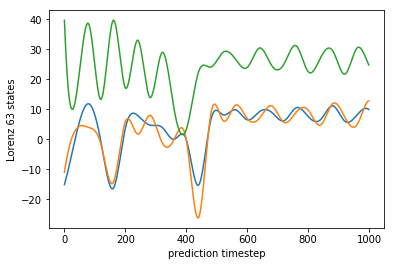

In [11]:
interp_time_step = 0.01
time_step_ratio = GD.dt_integration/interp_time_step
t_new  = np.linspace(0, t_pred, num=int(nb_steps_pred*time_step_ratio), endpoint=True)
t_init = np.linspace(0, t_pred, num=nb_steps_pred, endpoint=True)
true_Interp=interp1d(t_init, catalog.analogs[:y_pred.shape[0],:],axis=0, kind='cubic')
plt.plot(true_Interp(t_new)[:1000,:])
plt.xlabel('prediction timestep'); plt.ylabel('Lorenz 63 states')

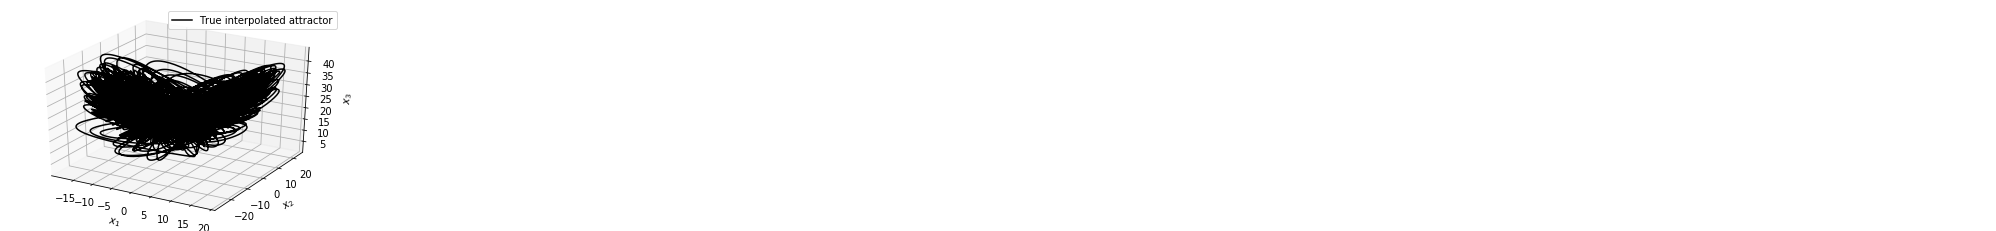

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig   =plt.figure()
ax    =fig.gca(projection='3d')
line1,=ax.plot(true_Interp(t_new)[:,0],true_Interp(t_new)[:,1],true_Interp(t_new)[:,2],'k')
ax.set_xlabel('$x_1$');ax.set_ylabel('$x_2$');ax.set_zlabel('$x_3$')
plt.legend([line1], ['True interpolated attractor'])

# ISSUE : 

Test with a different integration time step : 

we get a different phase space trajectorie which emphasizes an overfitting of the learnt integration scheme on the training integration time step

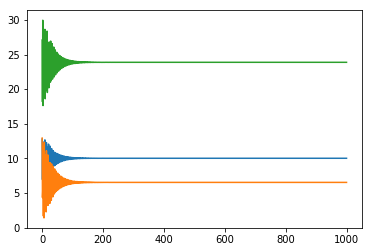

In [13]:
nb_steps_pred = 1000
t_pred = nb_steps_pred * GD.dt_integration
y_pred=np.zeros((nb_steps_pred,params['dim_output']))
tmp = np.reshape(xt.values[0,:],(1,params['dim_output']))
tmp = Variable(torch.from_numpy(tmp).float())

for i in range(nb_steps_pred):
    y_pred[i,:] = dyn_mdl(tmp,0.9*GD.dt_integration,order)[0].data.numpy()
    tmp = Variable(torch.from_numpy(np.reshape(y_pred[i,:] ,(1,params['dim_output']))).float())

plt.plot(y_pred)